In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
df=pd.DataFrame({
    'Voltage':np.random.uniform(160,220,257), 'Frequency':np.random.uniform(49,51,257),'Grounding resistance':np.random.uniform(0.05,1.5,257),
    'Degree of line burn':np.random.randint(1,5,size=257)
})
df.head()

,Voltage,Frequency,Grounding resistance,Degree of line burn
0,189.361430,49.936760,0.581537,3
1,172.770295,50.848276,1.018514,2
2,182.829168,50.156082,0.766414,3
3,199.973755,50.491363,0.589566,4
4,180.642450,49.025650,0.313852,4


In [204]:
df.isnull()

,Voltage,Frequency,Grounding resistance,Degree of line burn
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
252,False,False,False,False
253,False,False,False,False
254,False,False,False,False
255,False,False,False,False


In [205]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error

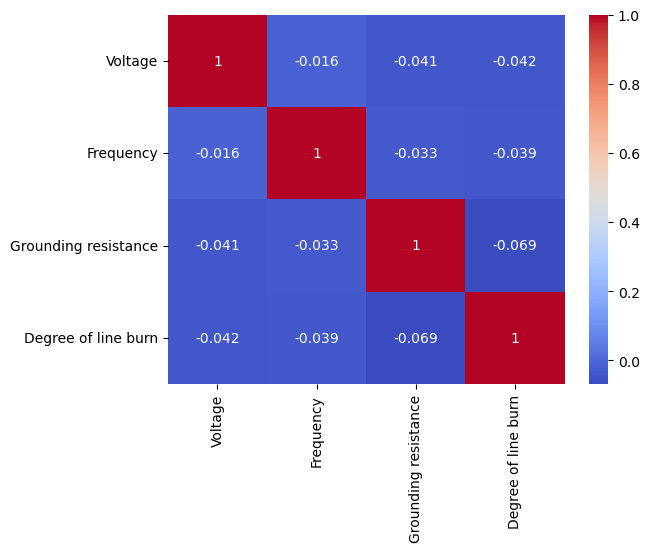

In [206]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [207]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=df[['Voltage','Frequency','Grounding resistance']]
y=df['Degree of line burn']
x_scaled=scaler.fit_transform(x)

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=14)


In [323]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [324]:
y_pred=model.predict(x_test)

In [325]:
f1=r2_score(y_test,y_pred)
print(f1)

-0.7913970308336509


In [326]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.3076923076923077


In [339]:
from sklearn.neighbors import KNeighborsClassifier

model1=KNeighborsClassifier(n_neighbors=4)
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [340]:
y_pred11=model1.predict(x_test)
print(accuracy_score(y_test,y_pred11))

0.28205128205128205


In [329]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=14)
tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [330]:
y_pred12=tree.predict(x_test)
print(accuracy_score(y_test,y_pred12))

0.2692307692307692


In [331]:
from sklearn import svm
c=svm.SVC(kernel='rbf')
c.fit(x_train,y_train)

SVC()

In [332]:
y_pred13=c.predict(x_test)
print(accuracy_score(y_test,y_pred13))

0.24358974358974358


In [337]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test,y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))

0.3076923076923077
0.32013003336532747
0.3076923076923077


In [342]:
print(accuracy_score(y_test, y_pred11))
print(precision_score(y_test,y_pred11,average='weighted'))
print(recall_score(y_test, y_pred11,average='weighted'))

0.28205128205128205
0.2920940170940171
0.28205128205128205


In [343]:
print(accuracy_score(y_test, y_pred12))
print(precision_score(y_test,y_pred12,average='weighted'))
print(recall_score(y_test, y_pred12,average='weighted'))

0.2692307692307692
0.27290723981900455
0.2692307692307692


In [344]:
print(accuracy_score(y_test, y_pred13))
print(precision_score(y_test,y_pred13,average='weighted'))
print(recall_score(y_test, y_pred13,average='weighted'))

0.24358974358974358
0.20064102564102565
0.24358974358974358


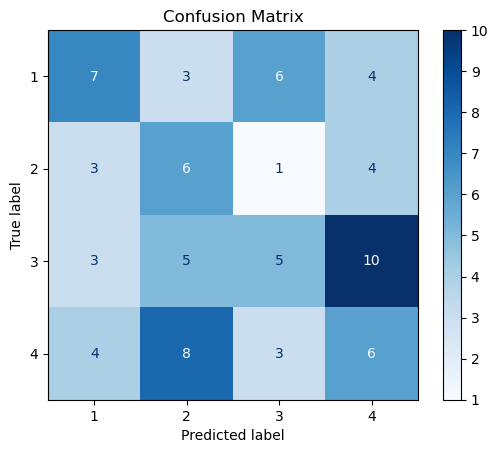

In [345]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_) 
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix") 
plt.show() 

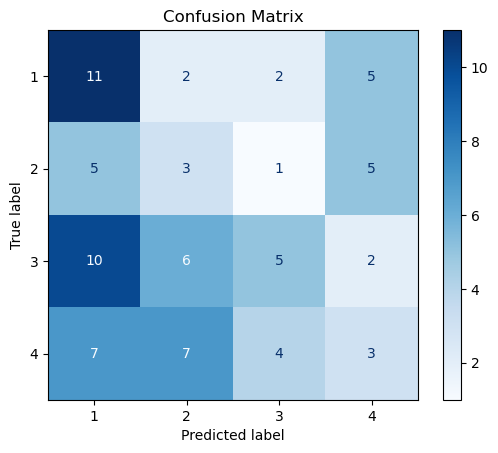

In [346]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
conf_matrix11 = confusion_matrix(y_test, y_pred11, labels=model1.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix11, display_labels=model1.classes_) 
disp.plot(cmap=plt.cm.Blues) 
plt.title("Confusion Matrix") 
plt.show() 

In [ ]:
# since this is a dataset with randomly generated values there is a strong negative correlation between features.
# so these basic set of alogithms wont yield better results. so must go for regularization or preproccesing and reworking on feature extraction